In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def split_dataset(filepath = "./Boston-filtered.csv", testsize = 1/3):
    data = pd.read_csv(filepath)

    data = data.sample(frac=1).reset_index(drop=True)

    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    # Split the dataset into training and test sets
    split_index = int(len(data) * (1 - testsize))

    X_train = X[:split_index]
    y_train = y[:split_index]

    X_test = X[split_index:]
    y_test = y[split_index:]

    return X_train, y_train, X_test, y_test

In [28]:
# (a)
num_runs = 20
training_errors = []
test_errors = []

def constant_attribute(X_train, y_train, X_test, y_test):
    y_mean = np.mean(y_train)

    X_train_ones = np.ones(len(X_train))
    X_test_ones = np.ones(len(X_test))

    y_train_pred = y_mean * X_train_ones
    y_test_pred = y_mean * X_test_ones

    mse_train = np.mean((y_train - y_train_pred)**2)
    mse_test = np.mean((y_test - y_test_pred)**2)

    return mse_train, mse_test

for run in range(num_runs):
    X_train, y_train, X_test, y_test = split_dataset()

    constant_mse_train, constant_mse_test = constant_attribute(X_train, y_train, X_test, y_test)
    training_errors.append(constant_mse_train)
    test_errors.append(constant_mse_test)

mean_training_error = np.mean(training_errors)
std_training_error = np.std(training_errors)
mean_test_error = np.mean(test_errors)
std_test_error = np.std(test_errors)

print(f"(Naive Regression) MSE training: {mean_training_error:.2f} ± {std_training_error:.2f}, MSE test: {mean_test_error:.2f} ± {std_test_error:.2f}")


(Naive Regression) MSE training: 85.72 ± 5.55, MSE test: 82.15 ± 11.07


(b) As constant prediction is used with no proper basis, we're not learning the relationship between features in the X dataset and one value is always predicted - the mean of the training label values.

The mean is the best value to use however when it comes to constant prediction as the mean minimises the squared difference betweenthe predicted and actual value

In [29]:
# (c)
def single_attribute(X_train, y_train, X_test, y_test):
    training_errors = []
    test_errors = []

    for i in range(X_train.shape[1]):
        X_train_single = X_train[:, i].reshape(-1, 1)
        X_test_single = X_test[:, i].reshape(-1, 1)

        # Augment the X matrix with a column of ones based off size of X_train and X_test
        X_train_augmented = np.hstack([X_train_single, np.ones((X_train_single.shape[0], 1))])
        X_test_augmented = np.hstack([X_test_single, np.ones((X_test_single.shape[0], 1))])

        w = np.linalg.inv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

        y_train_pred = X_train_augmented @ w
        y_test_pred = X_test_augmented @ w

        mse_train = np.mean((y_train - y_train_pred)**2)
        mse_test = np.mean((y_test - y_test_pred)**2)

        training_errors.append(mse_train)
        test_errors.append(mse_test)    

    return training_errors, test_errors

num_runs = 20
all_mse_train = np.zeros((num_runs, 12))
all_mse_test = np.zeros((num_runs, 12))

for run in range(num_runs):
    X_train, y_train, X_test, y_test = split_dataset()

    mse_train, mse_test = single_attribute(X_train, y_train, X_test, y_test)
    all_mse_train[run] = mse_train
    all_mse_test[run] = mse_test

mean_mse_single_train = np.mean(all_mse_train, axis=0)
std_mse_single_train = np.std(all_mse_train, axis=0)
mean_mse_single_test = np.mean(all_mse_test, axis=0)
std_mse_single_test = np.std(all_mse_test, axis=0)


for i in range(12):
    # print(f"Attribute {i+1} - Mean Training MSE: {mean_mse_single_train[i]:.4f}, Mean Test MSE: {mean_mse_single_test[i]:.4f}")
    print(f'Linear Regression (attribute {i+1}) - MSE train: {mean_mse_single_train[i]:.2f} ± {std_mse_single_train[i]:.2f}, MSE test: {mean_mse_single_test[i]:.2f} ± {std_mse_single_test[i]:.2f}')

Linear Regression (attribute 1) - MSE train: 72.20 ± 5.18, MSE test: 71.57 ± 10.81
Linear Regression (attribute 2) - MSE train: 72.90 ± 5.54, MSE test: 75.06 ± 11.15
Linear Regression (attribute 3) - MSE train: 64.87 ± 5.10, MSE test: 64.57 ± 10.16
Linear Regression (attribute 4) - MSE train: 81.70 ± 5.06, MSE test: 82.57 ± 10.10
Linear Regression (attribute 5) - MSE train: 68.95 ± 5.05, MSE test: 69.50 ± 10.17
Linear Regression (attribute 6) - MSE train: 44.21 ± 4.04, MSE test: 42.90 ± 8.06
Linear Regression (attribute 7) - MSE train: 72.00 ± 5.97, MSE test: 73.72 ± 12.07
Linear Regression (attribute 8) - MSE train: 78.95 ± 5.51, MSE test: 79.94 ± 11.09
Linear Regression (attribute 9) - MSE train: 71.84 ± 5.57, MSE test: 73.09 ± 11.17
Linear Regression (attribute 10) - MSE train: 65.67 ± 5.31, MSE test: 66.67 ± 10.57
Linear Regression (attribute 11) - MSE train: 61.85 ± 4.72, MSE test: 64.74 ± 9.40
Linear Regression (attribute 12) - MSE train: 38.44 ± 2.67, MSE test: 38.88 ± 5.39


In [30]:
# (d)
def all_attributes(X_train, y_train, X_test, y_test):
    # Augment the X matrix with a column of ones based off size of X_train and X_test
    X_train_augmented = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_test_augmented = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

    w = np.linalg.inv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

    y_train_pred = X_train_augmented @ w
    y_test_pred = X_test_augmented @ w

    mse_train = np.mean((y_train - y_train_pred)**2)
    mse_test = np.mean((y_test - y_test_pred)**2)

    return mse_train, mse_test

num_runs = 20
all_mse_train = np.zeros(num_runs)
all_mse_test = np.zeros(num_runs)

for run in range(num_runs):
    X_train, y_train, X_test, y_test = split_dataset()

    mse_train, mse_test = all_attributes(X_train, y_train, X_test, y_test)
    all_mse_train[run] = mse_train
    all_mse_test[run] = mse_test

mean_mse_train = np.mean(all_mse_train)
std_mse_train = np.std(all_mse_train)
mean_mse_test = np.mean(all_mse_test)
std_mse_test = np.std(all_mse_test)

print(f"Linear Regression (all attributes) MSE training: {mean_mse_train:.2f} ± {std_mse_train:.2f}, MSE test: {mean_mse_test:.2f} ± {std_mse_test:.2f}")

Linear Regression (all attributes) MSE training: 21.48 ± 2.01, MSE test: 25.87 ± 4.60


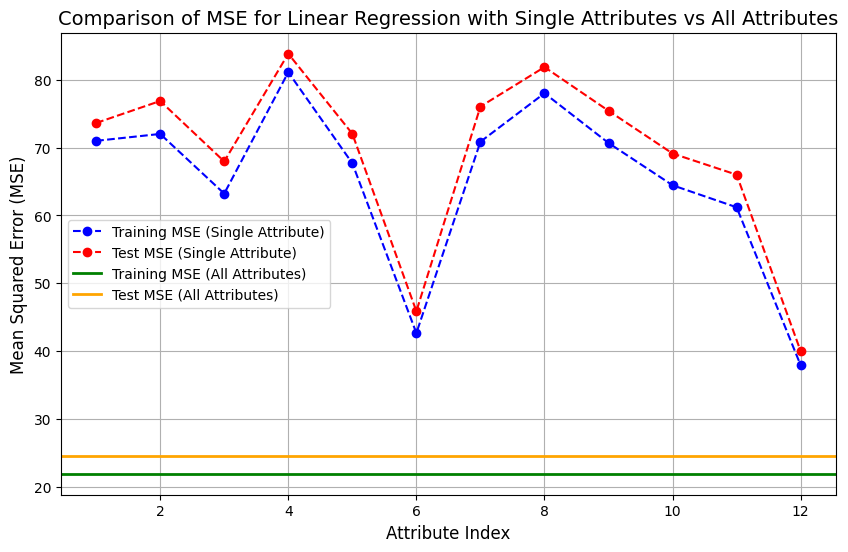

In [7]:
plt.figure(figsize=(10, 6))

# Plot individual attribute MSEs
plt.plot(range(1, 13), mean_mse_single_train, label="Training MSE (Single Attribute)", marker='o', linestyle='--', color='blue')
plt.plot(range(1, 13), mean_mse_single_test, label="Test MSE (Single Attribute)", marker='o', linestyle='--', color='red')

# Plot all attribute MSE
plt.axhline(mean_mse_train, label="Training MSE (All Attributes)", color='green', linestyle='-', linewidth=2)
plt.axhline(mean_mse_test, label="Test MSE (All Attributes)", color='orange', linestyle='-', linewidth=2)

# Labels and title
plt.xlabel('Attribute Index', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Comparison of MSE for Linear Regression with Single Attributes vs All Attributes', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import pandas as pd
import numpy as np

# Example data (you can replace these with your actual results)
methods = [
    "Naive Regression",
    "Linear Regression (attribute 1)",
    "Linear Regression (attribute 2)",
    "Linear Regression (attribute 3)",
    "Linear Regression (attribute 4)",
    "Linear Regression (attribute 5)",
    "Linear Regression (attribute 6)",
    "Linear Regression (attribute 7)",
    "Linear Regression (attribute 8)",
    "Linear Regression (attribute 9)",
    "Linear Regression (attribute 10)",
    "Linear Regression (attribute 11)",
    "Linear Regression (attribute 12)",
    "Linear Regression (all attributes)",
    "Kernel Ridge Regression"
]

# Random MSE and standard deviation values for demonstration (replace with actual values)
train_mse = np.random.uniform(0.5, 1.5, len(methods))  # Example train MSE
train_std = np.random.uniform(0.1, 0.5, len(methods))  # Example train std
test_mse = np.random.uniform(0.5, 1.5, len(methods))   # Example test MSE
test_std = np.random.uniform(0.1, 0.5, len(methods))   # Example test std

# Create a DataFrame
data = {
    "Method": methods,
    "MSE Train": [f"{m:.2f} ± {s:.2f}" for m, s in zip(train_mse, train_std)],
    "MSE Test": [f"{m:.2f} ± {s:.2f}" for m, s in zip(test_mse, test_std)]
}

df = pd.DataFrame(data)

# Display the DataFrame
df


,Method,MSE Train,MSE Test
0,Naive Regression,0.54 ± 0.27,1.02 ± 0.13
1,Linear Regression (attribute 1),0.89 ± 0.15,0.94 ± 0.48
2,Linear Regression (attribute 2),0.63 ± 0.16,1.43 ± 0.37
3,Linear Regression (attribute 3),0.84 ± 0.42,1.03 ± 0.43
4,Linear Regression (attribute 4),1.06 ± 0.29,0.91 ± 0.22
5,Linear Regression (attribute 5),1.08 ± 0.50,0.94 ± 0.15
6,Linear Regression (attribute 6),0.75 ± 0.50,1.09 ± 0.10
7,Linear Regression (attribute 7),1.40 ± 0.24,1.01 ± 0.36
8,Linear Regression (attribute 8),0.55 ± 0.16,1.15 ± 0.44
9,Linear Regression (attribute 9),1.38 ± 0.34,1.22 ± 0.16
